In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### Convert txt file to csv dataset

In [18]:
file_path = '../Datasets/Raw_Data/GSE160306_human_retina_DR_totalRNA_counts.txt'

df = pd.read_csv(file_path, index_col=0).T.sort_index()

df.to_csv('../Datasets/Dataset03/data0.csv')
df.head()

ensemblID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283690,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699
sample_01,124,2,300,398,421,18,84,206,1024,883,...,0,0,2,0,0,2,17,0,2,0
sample_02,111,0,374,351,502,32,278,238,973,1975,...,0,0,1,0,0,2,13,0,4,0
sample_03,135,3,265,395,525,28,177,214,990,1580,...,0,0,2,0,0,1,6,0,1,0
sample_04,122,1,420,496,365,23,173,243,1149,967,...,0,0,4,0,0,1,18,0,2,0
sample_05,209,0,439,917,631,67,428,189,1161,1368,...,0,0,0,0,0,1,31,0,7,0


### Combine data with target

In [19]:
df = pd.read_csv('../Datasets/Dataset03/data0.csv', index_col=0)
df_target = pd.read_csv('../Datasets/Dataset03/Diagnosis.csv', index_col=0)

df['Diagnosis'] = df_target
df.to_csv('../Datasets/Dataset03/data1.csv')

# Preprocessing

### Import Dataset

In [20]:
df = pd.read_csv("../Datasets/Dataset03/data1.csv", index_col=0)
df.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,Diagnosis
sample_01,124,2,300,398,421,18,84,206,1024,883,...,0,2,0,0,2,17,0,2,0,0
sample_02,111,0,374,351,502,32,278,238,973,1975,...,0,1,0,0,2,13,0,4,0,0
sample_03,135,3,265,395,525,28,177,214,990,1580,...,0,2,0,0,1,6,0,1,0,0
sample_04,122,1,420,496,365,23,173,243,1149,967,...,0,4,0,0,1,18,0,2,0,0
sample_05,209,0,439,917,631,67,428,189,1161,1368,...,0,0,0,0,1,31,0,7,0,0


In [12]:
df.describe()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,Diagnosis
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.0,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,190.898734,1.481013,346.177215,691.139241,530.291139,34.860759,184.303797,187.670886,922.341772,1408.518987,...,0.012658,3.531646,0.025316,0.0,1.075949,20.886076,0.050633,1.772152,0.037975,0.493671
std,108.009211,1.385463,67.341411,175.547841,110.322157,20.838041,92.073320,82.294767,227.667148,305.944475,...,0.112509,2.973539,0.158088,0.0,1.083349,7.448950,0.272629,1.624724,0.250284,0.503155
min,90.000000,0.000000,224.000000,351.000000,341.000000,7.000000,66.000000,58.000000,491.000000,833.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,131.000000,0.000000,298.000000,557.000000,454.500000,21.500000,119.500000,135.500000,774.000000,1163.000000,...,0.000000,2.000000,0.000000,0.0,0.000000,16.500000,0.000000,1.000000,0.000000,0.000000
50%,167.000000,1.000000,339.000000,684.000000,519.000000,31.000000,170.000000,167.000000,890.000000,1370.000000,...,0.000000,3.000000,0.000000,0.0,1.000000,19.000000,0.000000,1.000000,0.000000,0.000000
75%,211.000000,2.000000,386.000000,801.500000,592.000000,41.000000,220.500000,222.000000,1046.000000,1600.000000,...,0.000000,5.000000,0.000000,0.0,2.000000,24.500000,0.000000,3.000000,0.000000,1.000000
max,762.000000,6.000000,555.000000,1119.000000,797.000000,123.000000,576.000000,491.000000,1704.000000,2114.000000,...,1.000000,15.000000,1.000000,0.0,4.000000,42.000000,2.000000,7.000000,2.000000,1.000000


In [13]:
print(df.dtypes)
df.dtypes.unique()

ENSG00000000003    int64
ENSG00000000005    int64
ENSG00000000419    int64
ENSG00000000457    int64
ENSG00000000460    int64
                   ...  
ENSG00000283696    int64
ENSG00000283697    int64
ENSG00000283698    int64
ENSG00000283699    int64
Diagnosis          int64
Length: 58052, dtype: object


array([dtype('int64')], dtype=object)

In [14]:
print(df.isnull().sum())
df.isnull().sum().sum()

ENSG00000000003    0
ENSG00000000005    0
ENSG00000000419    0
ENSG00000000457    0
ENSG00000000460    0
                  ..
ENSG00000283696    0
ENSG00000283697    0
ENSG00000283698    0
ENSG00000283699    0
Diagnosis          0
Length: 58052, dtype: int64


0

In [15]:
df['Diagnosis']

sample_01    0
sample_02    0
sample_03    0
sample_04    0
sample_05    0
            ..
sample_76    1
sample_77    1
sample_78    1
sample_79    1
sample_80    1
Name: Diagnosis, Length: 79, dtype: int64

### Normalize data

In [21]:
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(df)

df_normalized = pd.DataFrame(X_normalized, columns=df.columns)

df_normalized.to_csv("../Datasets/Dataset03/data2.csv", index=True)

df_normalized.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,Diagnosis
0,0.050595,0.333333,0.229607,0.061198,0.175439,0.094828,0.035294,0.341801,0.439406,0.039032,...,0.0,0.133333,0.0,0.0,0.50,0.305556,0.0,0.285714,0.0,0.0
1,0.031250,0.000000,0.453172,0.000000,0.353070,0.215517,0.415686,0.415704,0.397362,0.891491,...,0.0,0.066667,0.0,0.0,0.50,0.194444,0.0,0.571429,0.0,0.0
2,0.066964,0.500000,0.123867,0.057292,0.403509,0.181034,0.217647,0.360277,0.411377,0.583138,...,0.0,0.133333,0.0,0.0,0.25,0.000000,0.0,0.142857,0.0,0.0
3,0.047619,0.166667,0.592145,0.188802,0.052632,0.137931,0.209804,0.427252,0.542457,0.104606,...,0.0,0.266667,0.0,0.0,0.25,0.333333,0.0,0.285714,0.0,0.0
4,0.177083,0.000000,0.649547,0.736979,0.635965,0.517241,0.709804,0.302540,0.552350,0.417642,...,0.0,0.000000,0.0,0.0,0.25,0.694444,0.0,1.000000,0.0,0.0


# Feature Selection

### Select best Feature Selection Algorithm

In [39]:
df = pd.read_csv("../Datasets/Dataset03/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

result_df = pd.DataFrame(
    columns=['Feature Selection Algorithm', 'Feature Count', 'Cross Validation Score'])

feature_counts = [25,50,100,150,200]

feature_selection_algorithms = [
    ('Information Gain (Mutual info)', mutual_info_classif),
    ('Correlation Coefficient', f_classif),
    ('Chi-Square', chi2),
    ('Feature Importance', RandomForestClassifier().fit(
        X, y).feature_importances_)
]

cv = KFold(n_splits=5, shuffle=True, random_state=42)

for algo_name, algo_func in feature_selection_algorithms:
    for count in feature_counts:
        if algo_name == 'Feature Importance':
            selected_features = X.columns[algo_func.argsort(
            )[-count:][::-1]]
        else:
            selected_features = X.columns[algo_func(
                X, y)[0].argsort()[-count:][::-1]]

        clf = GaussianNB()
        cv_scores = cross_val_score(
            clf, X[selected_features], y, cv=cv)

        result_df = pd.concat([result_df, pd.DataFrame({
            'Feature Selection Algorithm': [algo_name],
            'Feature Count': [count],
            'Cross Validation Score': [f'{cv_scores.mean():.2f}+/-{cv_scores.std():.2f}']
        })], ignore_index=True)

print(result_df)

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  600   768  1061 ... 58038 58041 58045] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACE

       Feature Selection Algorithm Feature Count Cross Validation Score
0   Information Gain (Mutual info)            25            0.37+/-0.08
1   Information Gain (Mutual info)            50            0.37+/-0.08
2   Information Gain (Mutual info)           100            0.37+/-0.08
3   Information Gain (Mutual info)           150            0.37+/-0.08
4   Information Gain (Mutual info)           200            0.37+/-0.08
5          Correlation Coefficient            25            0.51+/-0.14
6          Correlation Coefficient            50            0.51+/-0.14
7          Correlation Coefficient           100            0.51+/-0.14
8          Correlation Coefficient           150            0.51+/-0.14
9          Correlation Coefficient           200            0.51+/-0.14
10                      Chi-Square            25            0.51+/-0.14
11                      Chi-Square            50            0.51+/-0.14
12                      Chi-Square           100            0.51

c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:516: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:515: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
c:\Users\ACER\anaconda3\lib\site-packages\sklearn\naiv

### Check Feature Importance

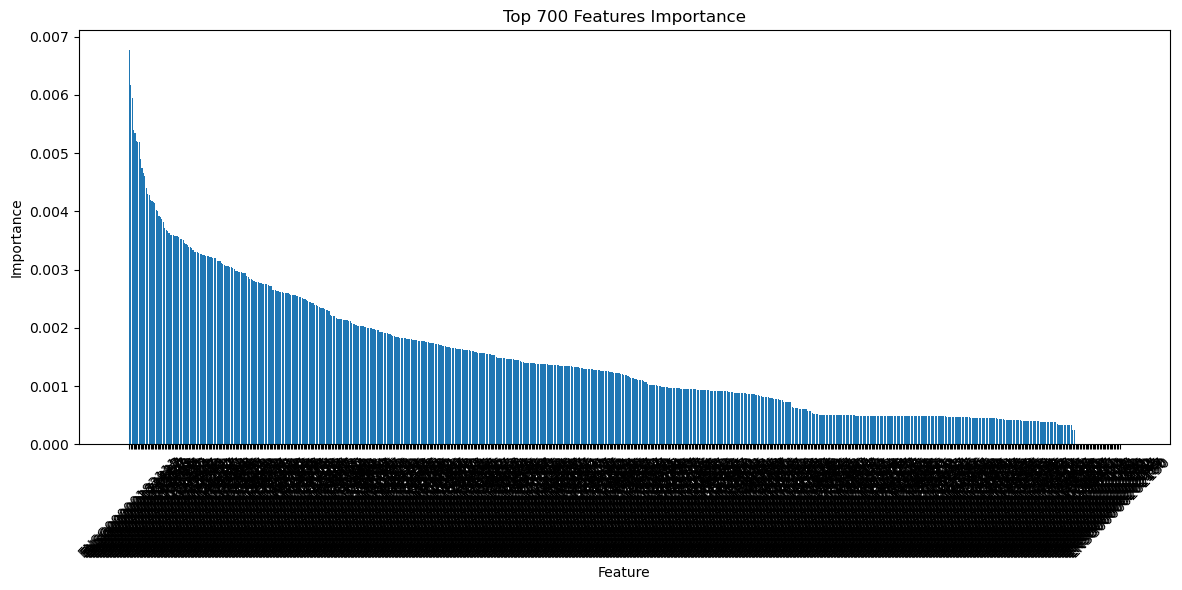

Last important feature:  668


In [2]:
df = pd.read_csv("../Datasets/Dataset03/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

feature_names = X.columns

k_values = [700] 

selected_features_dict = {}

for k in k_values:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X, y)
    feature_importances = clf.feature_importances_
    selected_features = np.array(feature_names)[
        np.argsort(feature_importances)[::-1][:k]]

    selected_features_dict[k] = selected_features

    sorted_idx = np.argsort(feature_importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(f"Top {k} Features Importance")
    plt.bar(range(k), feature_importances[sorted_idx][:k], align="center")
    plt.xticks(range(k), np.array(feature_names)[sorted_idx][:k], rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

    zero_importance_index = np.where(feature_importances == 0)[0]
    print("Last important feature: ", len(
        X.columns)-len(zero_importance_index))

### Feature Selection

In [36]:
df = pd.read_csv("../Datasets/Dataset03/data2.csv", index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

feature_counts = range(1,81)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

feature_importances = clf.feature_importances_

selected_features = X.columns[np.argsort(feature_importances)[::-1]]

datasets = {}
for count in feature_counts:
    datasets[count] = X[selected_features[:count]].copy()
    datasets[count]['Diagnosis'] = y

for count, dataset in datasets.items():
    dataset.to_csv(
        f'../Datasets/Dataset03/Feature_Select/dataset_{count}.csv', index=True)

## Model Building

### Check CV Score for Different Models

In [2]:
feature_counts = list(range(1, 81))

models = {
    "SVM(linear)": SVC(kernel='linear'),
    "SVM(poly)": SVC(kernel='poly'),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "ANN": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

results = pd.DataFrame(
    columns=["Model Name", "Feature Count", "CV Score (Mean +/- Std)"])

for count in feature_counts:
    file_path = f"../Datasets/Dataset03/Feature_Select/dataset_{count}.csv"
    df = pd.read_csv(file_path, index_col=0)

    X = df.drop('Diagnosis', axis=1)
    y = df['Diagnosis']

    for model_name, model in models.items():
        cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        result = f"{mean_score:.4f} +/- {std_score:.4f}"
        results = results.append({"Model Name": model_name, "Feature Count": count,
                                 "CV Score (Mean +/- Std)": result}, ignore_index=True)

results.sort_values(by=["CV Score (Mean +/- Std)"], ascending=False, inplace=True)
results.to_csv("../Datasets/Dataset03/Feature_Select/results.csv", index=False)

C:\Users\ACER\AppData\Local\Temp\ipykernel_12692\2002379458.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_12692\2002379458.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_12692\2002379458.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"Model Name": model_name, "Feature Count": count,
C:\Users\ACER\AppData\Local\Temp\ipykernel_12692\2002379458.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [38]:
df = pd.read_csv("../Datasets/Dataset03/Feature_Select/results.csv")
df.head(10)

,Model Name,Feature Count,CV Score (Mean +/- Std)
0,Naive Bayes,14,0.9625 +/- 0.0500
1,Naive Bayes,15,0.9625 +/- 0.0306
2,Naive Bayes,16,0.9625 +/- 0.0306
3,Random Forest,43,0.9500 +/- 0.0250
4,ANN,78,0.9375 +/- 0.0559
5,ANN,52,0.9375 +/- 0.0395
6,SVM(poly),20,0.9375 +/- 0.0395
7,ANN,64,0.9375 +/- 0.0395
8,ANN,61,0.9375 +/- 0.0395
9,ANN,55,0.9375 +/- 0.0395


### Check Distributions

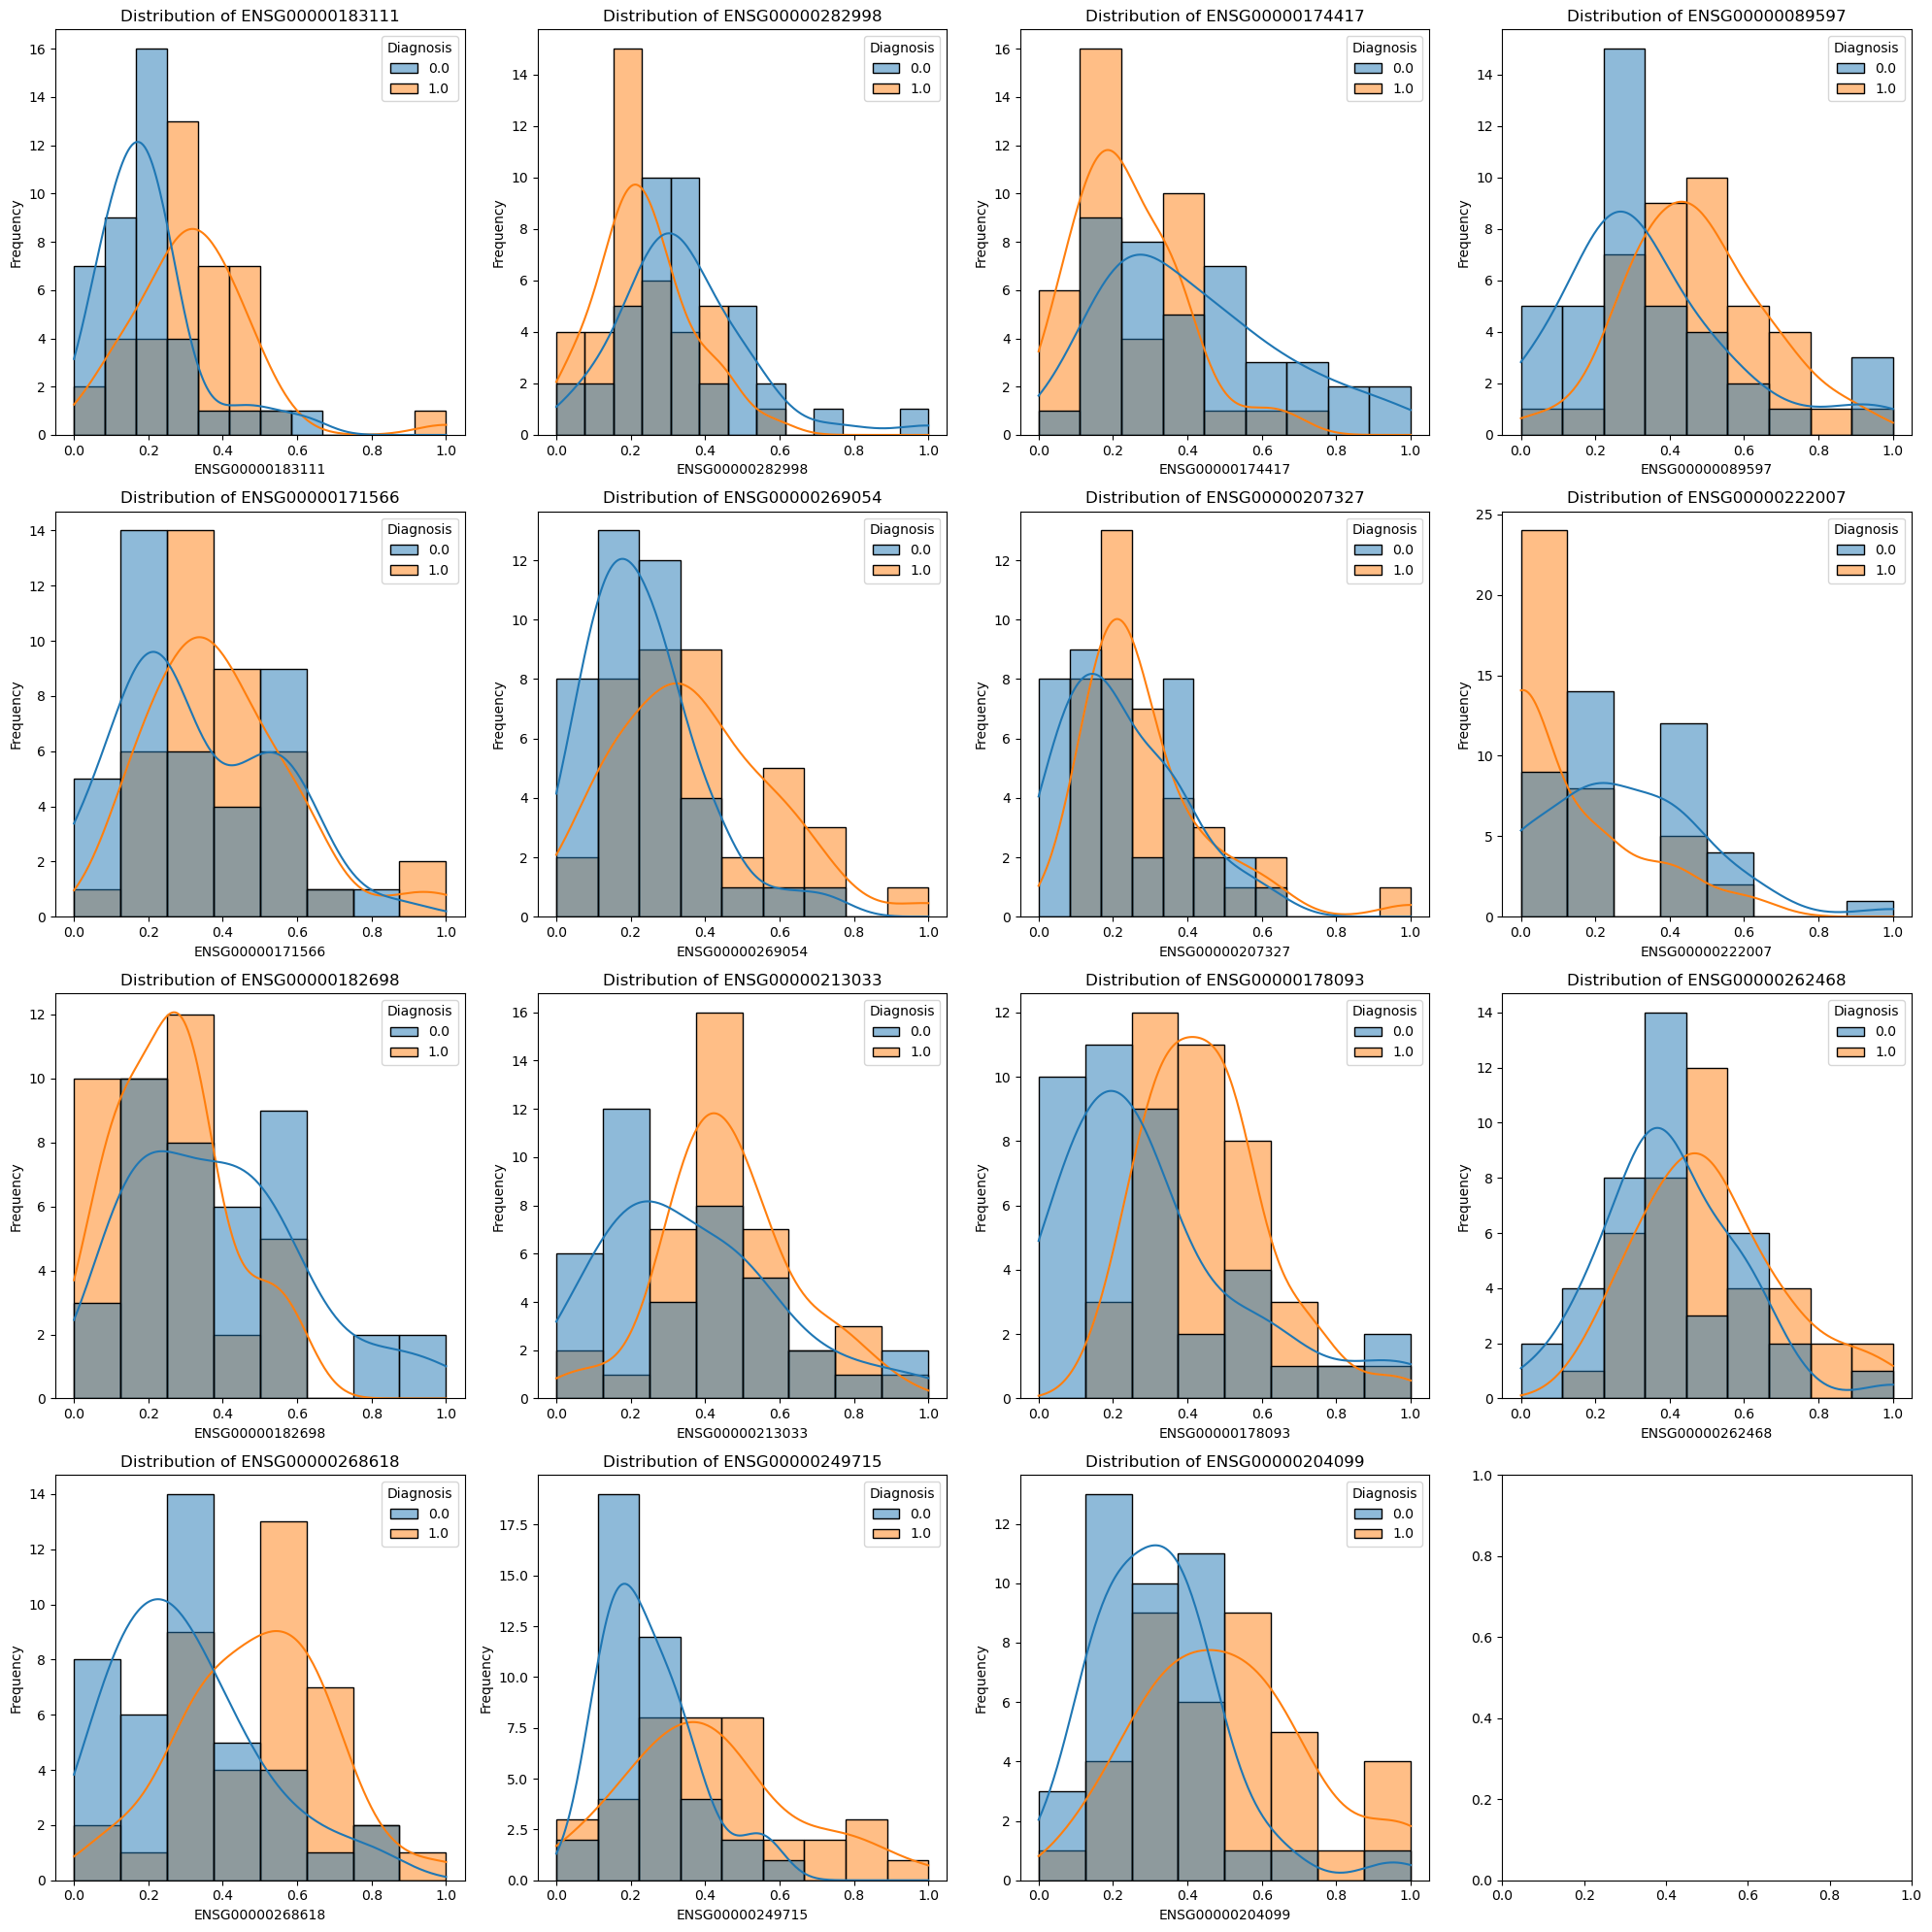

In [7]:
feature_count = 15

data = pd.read_csv(
    f'../Datasets/Dataset03/Feature_Select/dataset_{feature_count}.csv')

target_column = data.columns[feature_count + 1]

num_rows = math.ceil(feature_count / 4)
num_columns = 4

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))

for i in range(min(feature_count, num_rows * num_columns)):
    row_index = i // num_columns
    col_index = i % num_columns

    sns.histplot(
        data=data, x=data.columns[i + 1], hue=target_column, kde=True, ax=axes[row_index, col_index])

    axes[row_index, col_index].set_title(
        f'Distribution of {data.columns[i + 1]}')

    axes[row_index, col_index].set_xlabel(data.columns[i + 1])

    axes[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

### Check Accuracy

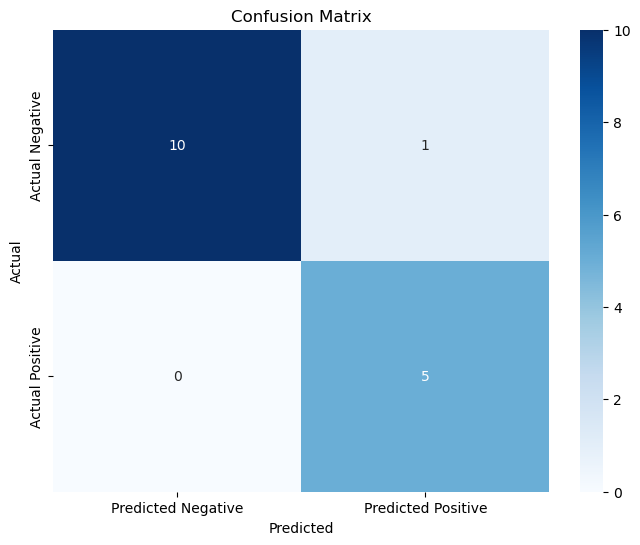

Accuracy: 0.94
Precision: 0.83
Recall (Sensitivity): 1.00
Specificity: 0.91
F1 Score: 0.91


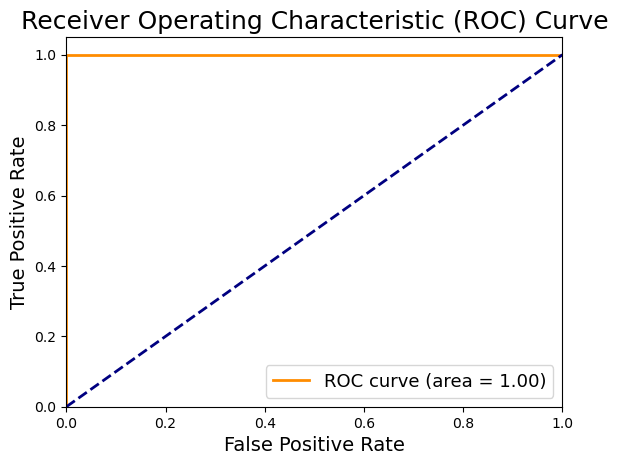

In [5]:
feature_count = 15

df = pd.read_csv(
    f'../Datasets/Dataset03/Feature_Select/dataset_{feature_count}.csv', index_col=0)

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc='lower right', fontsize=13)
plt.show()